# Churn analysis

On this project, we analyse churn and try to predict it most accurately possible. This code is divided in the following sessions:
- Data Analysis
- Data preprocessing
- ML models 
- Conclusions and sugestions

In [2]:
#importing basic libraries and reading the file

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('churn.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data analysis

In [4]:
#checking wether there are NaN values 

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

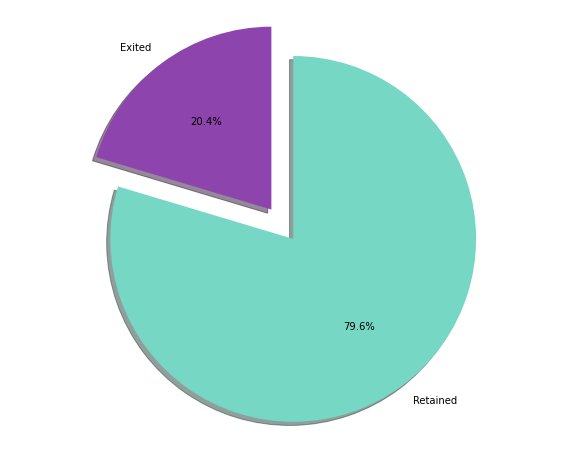

In [5]:
# Pie chart of the Exited column
labels = 'Exited', 'Retained'
colors = ['#8E44AD', '#76D7C4']
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.2)  # only "explode" 'exited'
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We have an imbalanced dataset, as we could expect from this type of data, where ~20% of customers churned. 
Let's see the dataset statistics.

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Looking at the EstimatedSalary and Balance columns, we can see there is high standard deviations. 
One thing we can suppose is that a client which a small value of salary will not have a great value of balance. Let's take a closer look at the data by imposing some conditions on these two columns:

In [7]:
df.loc[(df['EstimatedSalary'] <= 1000) & (df['Balance'] >= 5000)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
396,397,15584766,Knight,557,France,Male,33,3,54503.55,1,1,1,371.05,0
925,926,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,933,15634141,Shephard,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
1139,1140,15569247,Mitchell,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1462,1463,15566211,Hsu,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1
1758,1759,15645544,Nekrasov,642,Germany,Female,30,5,129753.69,1,1,0,582.53,0
2046,2047,15733429,Chou,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
2723,2724,15681550,Lablanc,614,France,Female,41,8,121558.46,1,1,1,598.80,0


Clients with high salary and low balance are either fraud or an error. Either way, we will exclude these clients, since we have no further information about them. 

In [8]:
df = df.drop(df[(df['EstimatedSalary'] <= 1000) & (df['Balance'] >= 5000)].index)
df.shape

(9967, 14)

Now, let's take a look on the distribution of some numerical variables and then categorical variables with Exited as hue.

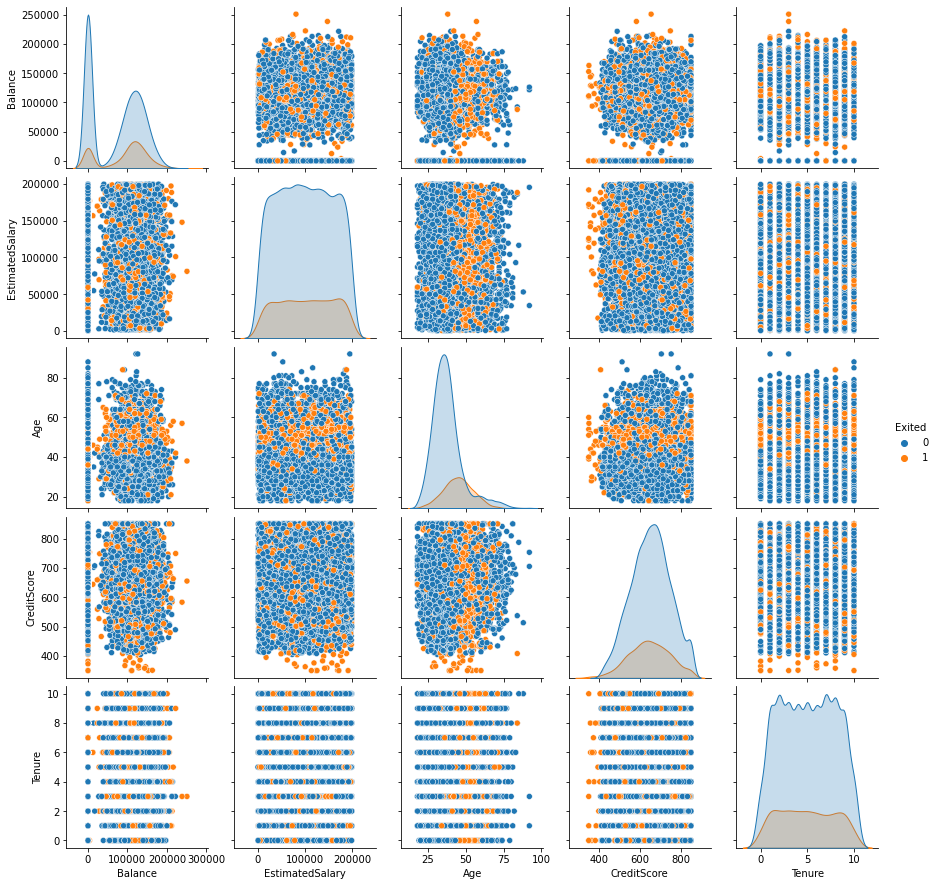

In [9]:
df2 = df.loc[:, ['Balance', 'EstimatedSalary', 'Age', 'CreditScore', 'Tenure', 'Exited']]
g = sns.pairplot(df2, hue= 'Exited')
plt.show()

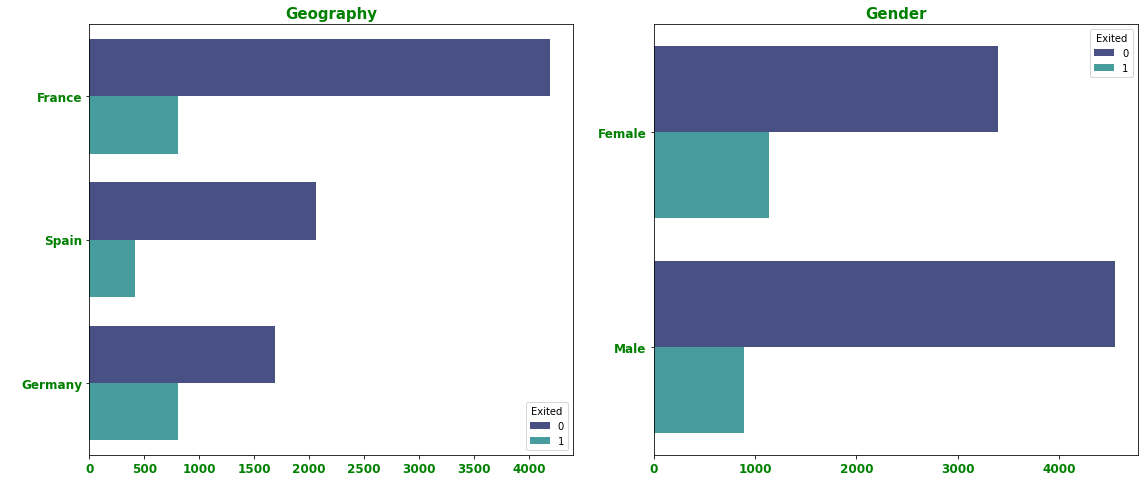

In [10]:
plt.figure(figsize = (16,7))
for i, col in enumerate(['Geography', 'Gender']):
    plt.subplot(1,2,(i+1))
    sns.countplot(y = col,  data = df, hue = 'Exited', palette="mako")
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = 'green')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.tight_layout();

In [12]:
#checking the proportion of clients that churned with respect to gender and geography
p_gender_churned = (df.loc[df['Exited']== 1, 'Gender'].value_counts())/df['Gender'].value_counts()
p_geo_churned = (df.loc[df['Exited']== 1, 'Geography'].value_counts())/df['Geography'].value_counts()
p_gender_churned, p_geo_churned

(Female    0.250331
 Male      0.164308
 Name: Gender, dtype: float64,
 France     0.161600
 Germany    0.323435
 Spain      0.166869
 Name: Geography, dtype: float64)

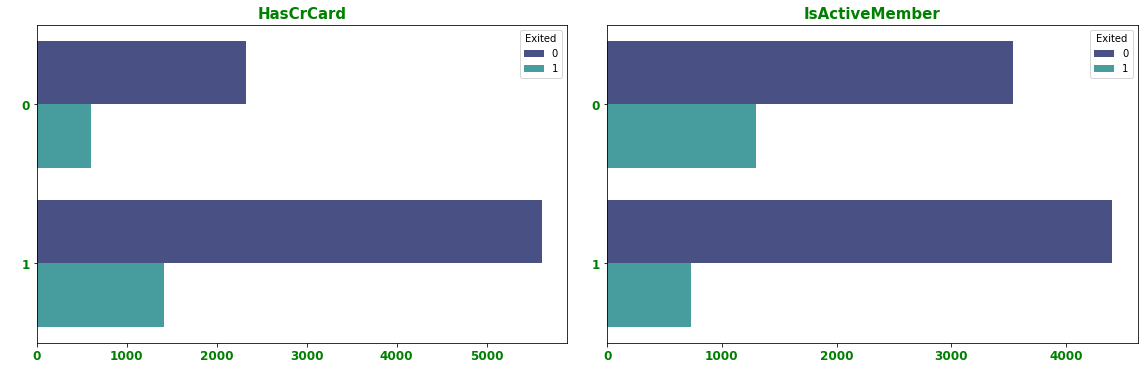

In [13]:
plt.figure(figsize = (16,10))
for i, col in enumerate(['HasCrCard', 'IsActiveMember']):
    plt.subplot(2,2,(i+1))
    sns.countplot(y = col,  data = df, hue='Exited', palette="mako")
    plt.xticks(rotation = 0)
    plt.title(col, fontsize = 15, fontweight = 'bold', color = 'green')
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
    plt.tight_layout();

In [14]:
#checking the proportion of clients with and without credit card that churned
p_hascrcard_churned = (df.loc[df['Exited']== 1, 'HasCrCard'].value_counts())/df['HasCrCard'].value_counts()
p_hascrcard_churned

1    0.201792
0    0.207155
Name: HasCrCard, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

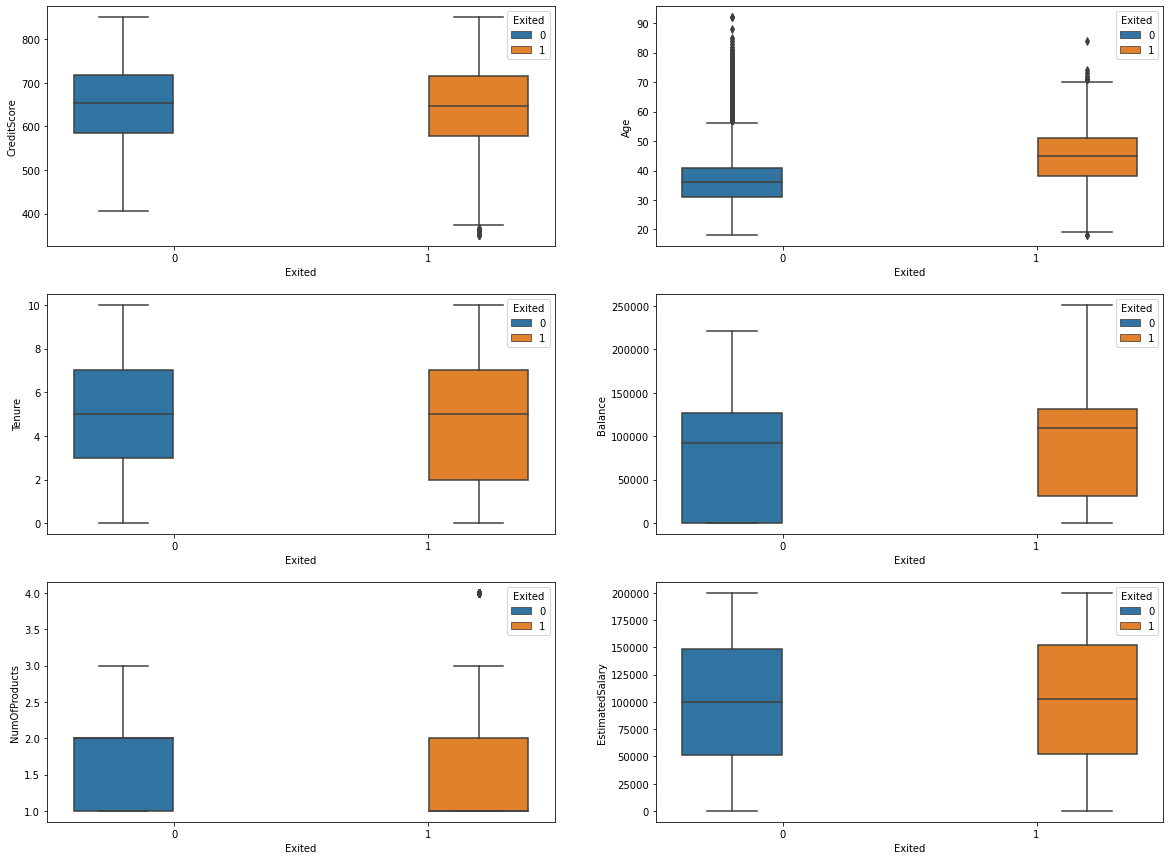

In [15]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [17]:
#checking the correlation matrix 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.003007,0.006432,0.000223,-0.007712,-0.009584,0.007553,0.001599,0.012942,-0.005395,-0.017989
CustomerId,0.003007,1.000000,0.006428,0.009831,-0.015875,-0.012108,0.016406,-0.014013,0.001380,0.014806,-0.006047
CreditScore,0.006432,0.006428,1.000000,-0.004546,0.001138,0.006104,0.012907,-0.005935,0.026337,-0.001074,-0.026669
Age,0.000223,0.009831,-0.004546,1.000000,-0.010414,0.027955,-0.030191,-0.010920,0.086188,-0.007017,0.284915
Tenure,-0.007712,-0.015875,0.001138,-0.010414,1.000000,-0.012712,0.012975,0.023169,-0.027397,0.008899,-0.014944
Balance,-0.009584,-0.012108,0.006104,0.027955,-0.012712,1.000000,-0.304165,-0.014561,-0.010104,0.016873,0.118187
NumOfProducts,0.007553,0.016406,0.012907,-0.030191,0.012975,-0.304165,1.000000,0.003535,0.009876,0.012042,-0.047228
HasCrCard,0.001599,-0.014013,-0.005935,-0.010920,0.023169,-0.014561,0.003535,1.000000,-0.012102,-0.010105,-0.006073
IsActiveMember,0.012942,0.001380,0.026337,0.086188,-0.027397,-0.010104,0.009876,-0.012102,1.000000,-0.011151,-0.156562
EstimatedSalary,-0.005395,0.014806,-0.001074,-0.007017,0.008899,0.016873,0.012042,-0.010105,-0.011151,1.000000,0.013613


Observations about the data:
- Variable distribuition is not Gaussian. Therefore, we won't stardardize the variables. Instead, we will normalize using minmaxscaler.
- Clients with older age exit less than the younger ones, with a peak of exiting around the age of 45.
- Clients from Germany and females exit more. 
- Active members exit less. For clients with and without credit card, there's no much different between the ones that churned and the ones that didn't.
- Clients with lower balance tend to exit more.
- Correlation matrix shows higher values for Age/Exited, Balance/Exited and negative correlation for Active Member/Exited, confirming what the graphs showed.

## Data preprocessing

In [18]:
#checking data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Since colums RowNumber, CustomerId and Surname do not have any influence on churn, they will be excluded. Categorical colums will be one hot encoded and numerical columns will be normalized.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Separate target from predictors
y = df.Exited
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42, stratify=y)
# Selecting categorical columns
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].dtype.name in ["object", "category"]] 

# Selecting numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy() #test data

categorical_cols, numerical_cols

(['Geography', 'Gender'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'])

In [20]:
y_test.value_counts()

0    1588
1     406
Name: Exited, dtype: int64

In [21]:
# Preprocessing data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

## ML Models

Models we will compare the performance of: Logistic Regression, SVC, Random Forest, XGB, LGBM and CatBoost. Not all of them will be hyperparameter tuned due to computational time. Metrics used will be AUC ROC, recall, precision and F1, since the dataset is imbalanced.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### LOGISTIC REGRESSION

In [23]:
lr_pip = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',LogisticRegression())
                             ])
lr_pip.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Geography', 'Gender']),
                                   ('num',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['CreditScore', 'Age', 'Tenure', 'Balance',
                                     'NumOfProducts', 'HasCrCard',
                                     'IsActiveMember', 'EstimatedSalary'])])),
  ('model', LogisticRegression())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['Geography', 'Gender']),
             

In [24]:
lr_params = {'model__C': [500, 100, 10, 1.0, 0.1, 0.01], #some hyperparameter tuning
             'model__solver': ['newton-cg', 'lbfgs', 'liblinear']}

lr_cv = GridSearchCV(lr_pip, param_grid=lr_params, n_jobs = -1, cv=10)
lr_cv.fit(X_train, y_train)
lr_cv.best_params_

{'model__C': 1.0, 'model__solver': 'liblinear'}

In [25]:
#pipeline with best hyperparameters
lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model',LogisticRegression(solver= "liblinear", C= 1)),
                             ])
lr_tuned = lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_report = classification_report(y_test, lr_preds)
lr_auc = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("Mean AUC: {:.2f}%" .format(lr_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(lr_auc.std()*100))
print(lr_report)


Mean AUC: 76.05%
Standard deviation: 2.81%
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1588
           1       0.64      0.21      0.32       406

    accuracy                           0.81      1994
   macro avg       0.73      0.59      0.60      1994
weighted avg       0.79      0.81      0.78      1994



In [26]:
lr_matrix = confusion_matrix(y_test, lr_preds)
lr_matrix

array([[1540,   48],
       [ 321,   85]], dtype=int64)

### SVC

In [27]:
svm_pip = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model',SVC(random_state=42))
                             ])
svm_pip.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Geography', 'Gender']),
                                   ('num',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['CreditScore', 'Age', 'Tenure', 'Balance',
                                     'NumOfProducts', 'HasCrCard',
                                     'IsActiveMember', 'EstimatedSalary'])])),
  ('model', SVC(random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['Geography', 'Gender']),
             

In [28]:
svm_params = {'model__C': [1000, 500, 100, 10, 1.0, 0.1, 0.01],
             'model__gamma': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

svm_cv = GridSearchCV(svm_pip, param_grid=svm_params, n_jobs = -1, cv=10)
svm_cv.fit(X_train, y_train)
svm_cv.best_params_

{'model__C': 10, 'model__gamma': 1}

In [ ]:
#pipeline with best hyperparameters
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('model',SVC(gamma = 1, C= 10)),
                             ])
svm_tuned = svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

svm_report = classification_report(y_test, svm_preds)
svm_auc = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10, scoring='roc_auc', n_jobs=-1)
print("Mean AUC: {:.2f}%" .format(svm_auc.mean()*100))
print("Standard deviation: {:.2f}%" .format(svm_auc.std()*100))
print(svm_report)